In [1314]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
from datetime import datetime
import pytz
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [1315]:
import os
os.listdir()

['.ipynb_checkpoints',
 'aapl_order.csv',
 'aapl_trade.csv',
 'data_preprocessing.py',
 'decision_tree',
 'feature_engineering_imputation.py',
 'gradient_boost',
 'Initial_EDA.ipynb',
 'Initial_EDA.py',
 'random_forest']

In [1316]:
# setting the file path and data_dict
file_path = "../book_snapshots/merged_book.csv"

datatype_dict = {'COLLECTION_TIME': object ,
                 'MESSAGE_ID': int,
                 'MESSAGE_TYPE': object,
                 'SYMBOL': object,
                 'BID_PRICE_1': float,
                 'BID_SIZE_1': int,
                 'BID_PRICE_2': float,
                 'BID_SIZE_2': int,
                 'BID_PRICE_3': float,
                 'BID_SIZE_3': int,
                 'ASK_PRICE_1': float,
                 'ASK_SIZE_1': int,
                 'ASK_PRICE_2': float,
                 'ASK_SIZE_2': int,
                 'ASK_PRICE_3': float,
                 'ASK_SIZE_3': int}

In [1317]:
# reading the order book data and returning the first 5 rows
df_o = pd.read_csv(file_path, dtype=datatype_dict)

df_o.head()

COLLECTION_TIME  MESSAGE_ID MESSAGE_TYPE SYMBOL  BID_PRICE_1  \
0  2023-06-01 13:30:00.166471936      386101   BID_UPDATE   AAPL       172.49   
1  2023-06-01 13:30:00.166471936      386102   ASK_UPDATE   AAPL       172.49   
2  2023-06-01 13:30:00.166471936      386108   BID_UPDATE   AAPL       172.49   
3  2023-06-01 13:30:00.166471936      386111   ASK_UPDATE   AAPL       172.49   
4  2023-06-01 13:30:00.177390080      387572   ASK_UPDATE   AAPL       172.49   

   BID_SIZE_1  BID_PRICE_2  BID_SIZE_2  BID_PRICE_3  BID_SIZE_3  ASK_PRICE_1  \
0         100       170.05         100       142.12         100        177.7   
1         100       170.05         100       142.12         100        177.7   
2         100       170.05         100       142.12         200        177.7   
3         100       170.05         100       142.12         200        177.7   
4         100       170.05         100       142.12         200        177.7   

   ASK_SIZE_1  ASK_PRICE_2  ASK_SIZE_2  ASK_PRICE_3  ASK_SIZE_3  
0           3       182.01         100       184.45         100  
1           3       182.01         100       184.45         100  
2           3       182.01         100       184.45         100  
3           3       182.01         100       184.45         100  
4           1       182.01         100       184.45         100

In [1318]:
df_o.tail()

COLLECTION_TIME  MESSAGE_ID MESSAGE_TYPE SYMBOL  \
7183440  2023-06-05 19:59:59.992762880   110425336   ASK_UPDATE   AMZN   
7183441  2023-06-05 19:59:59.993361920   110425381   ASK_UPDATE   AMZN   
7183442  2023-06-05 20:00:00.001079040   110425938   BID_UPDATE   AAPL   
7183443  2023-06-05 20:00:00.001079040   110425950   ASK_UPDATE   AAPL   
7183444  2023-06-05 20:00:00.001454080   110426003   BID_UPDATE   AMZN   

         BID_PRICE_1  BID_SIZE_1  BID_PRICE_2  BID_SIZE_2  BID_PRICE_3  \
7183440       125.27         300        99.94         100        85.01   
7183441       125.27         300        99.94         100        85.01   
7183442       179.03         100       154.76         100       143.50   
7183443       179.03         100       154.76         100       143.50   
7183444        99.94         100        85.01          10        75.00   

         BID_SIZE_3  ASK_PRICE_1  ASK_SIZE_1  ASK_PRICE_2  ASK_SIZE_2  \
7183440          10       125.31         200       126.00           2   
7183441          10       126.00           2       130.00         760   
7183442         100       179.61         200       184.33         100   
7183443         100       179.61         200       184.33         100   
7183444          10       126.00           2       130.00         760   

         ASK_PRICE_3  ASK_SIZE_3  
7183440        130.0         760  
7183441        135.0         200  
7183442        185.0         264  
7183443        185.0         264  
7183444        135.0         200

In [1319]:
df_o.columns

Index(['COLLECTION_TIME', 'MESSAGE_ID', 'MESSAGE_TYPE', 'SYMBOL',
       'BID_PRICE_1', 'BID_SIZE_1', 'BID_PRICE_2', 'BID_SIZE_2', 'BID_PRICE_3',
       'BID_SIZE_3', 'ASK_PRICE_1', 'ASK_SIZE_1', 'ASK_PRICE_2', 'ASK_SIZE_2',
       'ASK_PRICE_3', 'ASK_SIZE_3'],
      dtype='object')

In [1320]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7183445 entries, 0 to 7183444
Data columns (total 16 columns):
 #   Column           Dtype  
---  ------           -----  
 0   COLLECTION_TIME  object 
 1   MESSAGE_ID       int32  
 2   MESSAGE_TYPE     object 
 3   SYMBOL           object 
 4   BID_PRICE_1      float64
 5   BID_SIZE_1       int32  
 6   BID_PRICE_2      float64
 7   BID_SIZE_2       int32  
 8   BID_PRICE_3      float64
 9   BID_SIZE_3       int32  
 10  ASK_PRICE_1      float64
 11  ASK_SIZE_1       int32  
 12  ASK_PRICE_2      float64
 13  ASK_SIZE_2       int32  
 14  ASK_PRICE_3      float64
 15  ASK_SIZE_3       int32  
dtypes: float64(6), int32(7), object(3)
memory usage: 685.1+ MB


In [1321]:
df_o['COLLECTION_TIME'] = pd.to_datetime(df_o['COLLECTION_TIME'])

In [1322]:
df_o.head()

COLLECTION_TIME  MESSAGE_ID MESSAGE_TYPE SYMBOL  BID_PRICE_1  \
0 2023-06-01 13:30:00.166471936      386101   BID_UPDATE   AAPL       172.49   
1 2023-06-01 13:30:00.166471936      386102   ASK_UPDATE   AAPL       172.49   
2 2023-06-01 13:30:00.166471936      386108   BID_UPDATE   AAPL       172.49   
3 2023-06-01 13:30:00.166471936      386111   ASK_UPDATE   AAPL       172.49   
4 2023-06-01 13:30:00.177390080      387572   ASK_UPDATE   AAPL       172.49   

   BID_SIZE_1  BID_PRICE_2  BID_SIZE_2  BID_PRICE_3  BID_SIZE_3  ASK_PRICE_1  \
0         100       170.05         100       142.12         100        177.7   
1         100       170.05         100       142.12         100        177.7   
2         100       170.05         100       142.12         200        177.7   
3         100       170.05         100       142.12         200        177.7   
4         100       170.05         100       142.12         200        177.7   

   ASK_SIZE_1  ASK_PRICE_2  ASK_SIZE_2  ASK_PRICE_3  ASK_SIZE_3  
0           3       182.01         100       184.45         100  
1           3       182.01         100       184.45         100  
2           3       182.01         100       184.45         100  
3           3       182.01         100       184.45         100  
4           1       182.01         100       184.45         100

In [1323]:
df_oappl = df_o.loc[df_o['SYMBOL']=='AAPL']

In [1324]:
df_oappl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2432131 entries, 0 to 7183443
Data columns (total 16 columns):
 #   Column           Dtype         
---  ------           -----         
 0   COLLECTION_TIME  datetime64[ns]
 1   MESSAGE_ID       int32         
 2   MESSAGE_TYPE     object        
 3   SYMBOL           object        
 4   BID_PRICE_1      float64       
 5   BID_SIZE_1       int32         
 6   BID_PRICE_2      float64       
 7   BID_SIZE_2       int32         
 8   BID_PRICE_3      float64       
 9   BID_SIZE_3       int32         
 10  ASK_PRICE_1      float64       
 11  ASK_SIZE_1       int32         
 12  ASK_PRICE_2      float64       
 13  ASK_SIZE_2       int32         
 14  ASK_PRICE_3      float64       
 15  ASK_SIZE_3       int32         
dtypes: datetime64[ns](1), float64(6), int32(7), object(2)
memory usage: 250.5+ MB


In [1325]:
# Grouping by 'COLLECTION_TIME' and aggregating with different functions
df_oappl_agg = df_oappl.groupby('COLLECTION_TIME').agg({
    'BID_PRICE_1': 'mean',
    'ASK_PRICE_1': 'mean',
    'BID_PRICE_2': 'mean',
    'ASK_PRICE_2': 'mean',
    'BID_PRICE_3': 'mean',
    'ASK_PRICE_3': 'mean'
})


# Resample the entire DataFrame to 5-minute intervals using nearest
df_oappl_resampled = df_oappl_agg.resample('1T').agg({
    'BID_PRICE_1': 'mean',
    'ASK_PRICE_1': 'mean',
    'BID_PRICE_2': 'mean',
    'ASK_PRICE_2': 'mean',
    'BID_PRICE_3': 'mean',
    'ASK_PRICE_3': 'mean'
    # sum of sizes within each 1-minute interval
})


# Reset index to make 'COLLECTION_TIME' a column again
df_oappl_resampled.reset_index(inplace=True)
df_oappl_resampled.head()

COLLECTION_TIME  BID_PRICE_1  ASK_PRICE_1  BID_PRICE_2  ASK_PRICE_2  \
0 2023-06-01 13:30:00   175.558892   179.017191   172.466600   181.089909   
1 2023-06-01 13:31:00   174.526555   178.728673   172.049358   180.821400   
2 2023-06-01 13:32:00   175.198658   178.971122   172.637389   181.159767   
3 2023-06-01 13:33:00   176.381679   179.507488   173.927156   181.508706   
4 2023-06-01 13:34:00   175.958447   179.615670   173.110890   181.581846   

   BID_PRICE_3  ASK_PRICE_3  
0   169.968077   186.488671  
1   170.642845   182.996334  
2   170.957526   183.357753  
3   171.584340   183.759027  
4   171.160274   183.858721

In [1326]:
df_oappl_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6151 entries, 0 to 6150
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   COLLECTION_TIME  6151 non-null   datetime64[ns]
 1   BID_PRICE_1      1171 non-null   float64       
 2   ASK_PRICE_1      1171 non-null   float64       
 3   BID_PRICE_2      1171 non-null   float64       
 4   ASK_PRICE_2      1171 non-null   float64       
 5   BID_PRICE_3      1171 non-null   float64       
 6   ASK_PRICE_3      1171 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 336.5 KB


In [1327]:
df_oappl_resampled.head()

COLLECTION_TIME  BID_PRICE_1  ASK_PRICE_1  BID_PRICE_2  ASK_PRICE_2  \
0 2023-06-01 13:30:00   175.558892   179.017191   172.466600   181.089909   
1 2023-06-01 13:31:00   174.526555   178.728673   172.049358   180.821400   
2 2023-06-01 13:32:00   175.198658   178.971122   172.637389   181.159767   
3 2023-06-01 13:33:00   176.381679   179.507488   173.927156   181.508706   
4 2023-06-01 13:34:00   175.958447   179.615670   173.110890   181.581846   

   BID_PRICE_3  ASK_PRICE_3  
0   169.968077   186.488671  
1   170.642845   182.996334  
2   170.957526   183.357753  
3   171.584340   183.759027  
4   171.160274   183.858721

In [1328]:
df_oappl_resampled.columns

Index(['COLLECTION_TIME', 'BID_PRICE_1', 'ASK_PRICE_1', 'BID_PRICE_2',
       'ASK_PRICE_2', 'BID_PRICE_3', 'ASK_PRICE_3'],
      dtype='object')

In [1329]:
df_oappl_resampled['SYMBOL'] = 'AAPL'

In [1330]:
df_oappl_resampled = df_oappl_resampled[['COLLECTION_TIME', 'SYMBOL', 'BID_PRICE_1', 'ASK_PRICE_1', 'BID_PRICE_2',
                             'ASK_PRICE_2', 'BID_PRICE_3', 'ASK_PRICE_3']]

In [1331]:
df_oappl_resampled.head()

COLLECTION_TIME SYMBOL  BID_PRICE_1  ASK_PRICE_1  BID_PRICE_2  \
0 2023-06-01 13:30:00   AAPL   175.558892   179.017191   172.466600   
1 2023-06-01 13:31:00   AAPL   174.526555   178.728673   172.049358   
2 2023-06-01 13:32:00   AAPL   175.198658   178.971122   172.637389   
3 2023-06-01 13:33:00   AAPL   176.381679   179.507488   173.927156   
4 2023-06-01 13:34:00   AAPL   175.958447   179.615670   173.110890   

   ASK_PRICE_2  BID_PRICE_3  ASK_PRICE_3  
0   181.089909   169.968077   186.488671  
1   180.821400   170.642845   182.996334  
2   181.159767   170.957526   183.357753  
3   181.508706   171.584340   183.759027  
4   181.581846   171.160274   183.858721

In [1332]:
df_oappl_resampled.tail()

COLLECTION_TIME SYMBOL  BID_PRICE_1  ASK_PRICE_1  BID_PRICE_2  \
6146 2023-06-05 19:56:00   AAPL   179.620367   179.655276   179.602266   
6147 2023-06-05 19:57:00   AAPL   179.466593   179.544930   179.344782   
6148 2023-06-05 19:58:00   AAPL   179.463475   179.534542   179.358729   
6149 2023-06-05 19:59:00   AAPL   179.396263   180.039868   177.933859   
6150 2023-06-05 20:00:00   AAPL   179.030000   179.610000   154.760000   

      ASK_PRICE_2  BID_PRICE_3  ASK_PRICE_3  
6146   179.687096   179.573043   179.727216  
6147   179.578596   179.198545   179.612784  
6148   179.566120   179.269727   179.599974  
6149   180.819406   176.364300   182.864938  
6150   184.330000   143.500000   185.000000

In [1333]:
# Define the function to convert datetime
def convert_utc_to_eastern(utc_datetime):
    utc_timezone = pytz.timezone("UTC")
    eastern_timezone = pytz.timezone("America/New_York")
    eastern_datetime = utc_timezone.localize(utc_datetime).astimezone(eastern_timezone)
    return eastern_datetime.strftime('%Y-%m-%d %H:%M:%S')

In [1334]:
# Apply the conversion function to the COLLECTION_TIME column
df_oappl_resampled['COLLECTION_TIME'] = df_oappl_resampled['COLLECTION_TIME'].apply(convert_utc_to_eastern)

In [1335]:
df_oappl_resampled.head()

COLLECTION_TIME SYMBOL  BID_PRICE_1  ASK_PRICE_1  BID_PRICE_2  \
0  2023-06-01 09:30:00   AAPL   175.558892   179.017191   172.466600   
1  2023-06-01 09:31:00   AAPL   174.526555   178.728673   172.049358   
2  2023-06-01 09:32:00   AAPL   175.198658   178.971122   172.637389   
3  2023-06-01 09:33:00   AAPL   176.381679   179.507488   173.927156   
4  2023-06-01 09:34:00   AAPL   175.958447   179.615670   173.110890   

   ASK_PRICE_2  BID_PRICE_3  ASK_PRICE_3  
0   181.089909   169.968077   186.488671  
1   180.821400   170.642845   182.996334  
2   181.159767   170.957526   183.357753  
3   181.508706   171.584340   183.759027  
4   181.581846   171.160274   183.858721

In [1336]:
file_path1 = "C:/Users/yadve/OneDrive/Desktop/Master_Folder/Python_Codes/Untitled Folder/Fresh/book_snapshots/merged_trade_files.csv"
df_t = pd.read_csv(file_path1)
df_t.head()

COLLECTION_TIME  MESSAGE_ID MESSAGE_TYPE SYMBOL   PRICE  \
0  2023-06-01 12:00:33.635252992       47955            T   MSFT  327.95   
1  2023-06-01 12:00:33.635375104       47956            T   MSFT  327.96   
2  2023-06-01 12:00:36.442275072       48032            T   META  266.69   
3  2023-06-01 12:01:19.039532032       49803            T   META  266.81   
4  2023-06-01 12:01:19.039600128       49804            T   META  266.81   

   SIZE  TRADE_ID             TRADE_FLAGS  
0    25   3517851  EXTENDED_HOURS|ODD_LOT  
1    10   3517856  EXTENDED_HOURS|ODD_LOT  
2     9   3521162  EXTENDED_HOURS|ODD_LOT  
3    25   3622633  EXTENDED_HOURS|ODD_LOT  
4    25   3622638  EXTENDED_HOURS|ODD_LOT

In [1337]:
df_t['COLLECTION_TIME'] = pd.to_datetime(df_t['COLLECTION_TIME'])

In [1338]:
df_tappl = df_t.loc[df_t['SYMBOL']=='AAPL']
df_tappl.head()

COLLECTION_TIME  MESSAGE_ID MESSAGE_TYPE SYMBOL   PRICE  \
6  2023-06-01 12:01:45.918413056       50949            T   AAPL  177.85   
7  2023-06-01 12:01:45.918472960       50950            T   AAPL  177.85   
12 2023-06-01 12:02:30.717871104       53032            T   AAPL  177.85   
14 2023-06-01 12:03:40.914121984       55467            T   AAPL  177.83   
15 2023-06-01 12:03:40.914183936       55468            T   AAPL  177.83   

    SIZE  TRADE_ID             TRADE_FLAGS  
6     50   3691149  EXTENDED_HOURS|ODD_LOT  
7     50   3691154  EXTENDED_HOURS|ODD_LOT  
12    20   3786751  EXTENDED_HOURS|ODD_LOT  
14    50   3903112  EXTENDED_HOURS|ODD_LOT  
15    50   3903118  EXTENDED_HOURS|ODD_LOT

In [1339]:
df_tappl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37987 entries, 6 to 173570
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   COLLECTION_TIME  37987 non-null  datetime64[ns]
 1   MESSAGE_ID       37987 non-null  int64         
 2   MESSAGE_TYPE     37987 non-null  object        
 3   SYMBOL           37987 non-null  object        
 4   PRICE            37987 non-null  float64       
 5   SIZE             37987 non-null  int64         
 6   TRADE_ID         37987 non-null  int64         
 7   TRADE_FLAGS      37987 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 2.6+ MB


In [1340]:
# Filter the DataFrame for rows where 'TRADE_FLAGS' contains 'REGULAR_HOURS'
df_tappl_filter = df_tappl[df_tappl['TRADE_FLAGS'].str.contains('REGULAR_HOURS')]

In [1341]:
df_tappl_filter['TRADE_FLAGS'].value_counts()

REGULAR_HOURS                                                   15980
REGULAR_HOURS|ODD_LOT                                           10815
INTERMARKET_SWEEP|REGULAR_HOURS                                  5571
INTERMARKET_SWEEP|REGULAR_HOURS|ODD_LOT                          4489
INTERMARKET_SWEEP|REGULAR_HOURS|TRADE_THROUGH_EXEMPT              385
INTERMARKET_SWEEP|REGULAR_HOURS|ODD_LOT|TRADE_THROUGH_EXEMPT      182
REGULAR_HOURS|ODD_LOT|TRADE_THROUGH_EXEMPT                          3
Name: TRADE_FLAGS, dtype: int64

In [1342]:
df_tappl_filter.head()

COLLECTION_TIME  MESSAGE_ID MESSAGE_TYPE SYMBOL   PRICE  \
896 2023-06-01 13:30:00.138947072      383094            T   AAPL  177.68   
897 2023-06-01 13:30:00.138947072      383096            T   AAPL  177.68   
898 2023-06-01 13:30:00.138947072      383098            T   AAPL  177.68   
899 2023-06-01 13:30:00.138947072      383101            T   AAPL  177.70   
901 2023-06-01 13:30:00.177390080      387565            T   AAPL  177.69   

     SIZE  TRADE_ID            TRADE_FLAGS  
896    10  21955214  REGULAR_HOURS|ODD_LOT  
897    10  21955275  REGULAR_HOURS|ODD_LOT  
898    10  21955310  REGULAR_HOURS|ODD_LOT  
899     3  21955367  REGULAR_HOURS|ODD_LOT  
901     1  22039932  REGULAR_HOURS|ODD_LOT

In [1343]:
# Grouping by 'COLLECTION_TIME' and aggregating with different functions
df_tappl_agg = df_tappl_filter.groupby('COLLECTION_TIME').agg({
    'PRICE': 'mean',
    'SIZE': 'sum'
})

# Resample the entire DataFrame to 5-minute intervals using nearest
df_tappl_resampled = df_tappl_agg.resample('1T').agg({
    'PRICE': ['mean', 'max', 'min'],  # mean of prices within each 1-minute interval
    'SIZE': 'sum',
    # sum of sizes within each 1-minute interval
})

df_tappl_resampled.columns = ['_'.join(col).strip() for col in df_tappl_resampled.columns.values]

# Reset index to make 'COLLECTION_TIME' a column again
df_tappl_resampled.reset_index(inplace=True)
df_tappl_resampled.head()

COLLECTION_TIME  PRICE_mean  PRICE_max  PRICE_min  SIZE_sum
0 2023-06-01 13:30:00  177.720254     177.86    177.410      8301
1 2023-06-01 13:31:00  177.252744     177.52    177.090      7316
2 2023-06-01 13:32:00  177.142456     177.27    176.950      5769
3 2023-06-01 13:33:00  177.511517     177.67    177.215     10020
4 2023-06-01 13:34:00  177.512705     177.60    177.410     17011

In [1344]:
df_tappl_resampled.columns

Index(['COLLECTION_TIME', 'PRICE_mean', 'PRICE_max', 'PRICE_min', 'SIZE_sum'], dtype='object')

In [1345]:
# Apply the conversion function to the COLLECTION_TIME column
df_tappl_resampled['COLLECTION_TIME'] = df_tappl_resampled['COLLECTION_TIME'].apply(convert_utc_to_eastern)

In [1346]:
df_tappl_resampled.tail()

COLLECTION_TIME  PRICE_mean  PRICE_max  PRICE_min  SIZE_sum
6145  2023-06-05 15:55:00  179.522548    179.600    179.340     16726
6146  2023-06-05 15:56:00  179.635156    179.680    179.585     12004
6147  2023-06-05 15:57:00  179.538492    179.600    179.470     20140
6148  2023-06-05 15:58:00  179.517117    179.580    179.460     28818
6149  2023-06-05 15:59:00  179.582406    179.695    179.510     38395

In [1347]:
df_oappl_resampled.head()

COLLECTION_TIME SYMBOL  BID_PRICE_1  ASK_PRICE_1  BID_PRICE_2  \
0  2023-06-01 09:30:00   AAPL   175.558892   179.017191   172.466600   
1  2023-06-01 09:31:00   AAPL   174.526555   178.728673   172.049358   
2  2023-06-01 09:32:00   AAPL   175.198658   178.971122   172.637389   
3  2023-06-01 09:33:00   AAPL   176.381679   179.507488   173.927156   
4  2023-06-01 09:34:00   AAPL   175.958447   179.615670   173.110890   

   ASK_PRICE_2  BID_PRICE_3  ASK_PRICE_3  
0   181.089909   169.968077   186.488671  
1   180.821400   170.642845   182.996334  
2   181.159767   170.957526   183.357753  
3   181.508706   171.584340   183.759027  
4   181.581846   171.160274   183.858721

In [1348]:
print(len(df_tappl_resampled))
print(len(df_oappl_resampled))

6150
6151


In [1349]:
order_trade_merged = pd.merge(df_oappl_resampled, df_tappl_resampled, on='COLLECTION_TIME', how='left')
order_trade_merged['COLLECTION_TIME'] = pd.to_datetime(order_trade_merged['COLLECTION_TIME'])
order_trade_merged.set_index('COLLECTION_TIME', inplace=True)
order_trade_merged.head()

SYMBOL  BID_PRICE_1  ASK_PRICE_1  BID_PRICE_2  \
COLLECTION_TIME                                                     
2023-06-01 09:30:00   AAPL   175.558892   179.017191   172.466600   
2023-06-01 09:31:00   AAPL   174.526555   178.728673   172.049358   
2023-06-01 09:32:00   AAPL   175.198658   178.971122   172.637389   
2023-06-01 09:33:00   AAPL   176.381679   179.507488   173.927156   
2023-06-01 09:34:00   AAPL   175.958447   179.615670   173.110890   

                     ASK_PRICE_2  BID_PRICE_3  ASK_PRICE_3  PRICE_mean  \
COLLECTION_TIME                                                          
2023-06-01 09:30:00   181.089909   169.968077   186.488671  177.720254   
2023-06-01 09:31:00   180.821400   170.642845   182.996334  177.252744   
2023-06-01 09:32:00   181.159767   170.957526   183.357753  177.142456   
2023-06-01 09:33:00   181.508706   171.584340   183.759027  177.511517   
2023-06-01 09:34:00   181.581846   171.160274   183.858721  177.512705   

                     PRICE_max  PRICE_min  SIZE_sum  
COLLECTION_TIME                                      
2023-06-01 09:30:00     177.86    177.410    8301.0  
2023-06-01 09:31:00     177.52    177.090    7316.0  
2023-06-01 09:32:00     177.27    176.950    5769.0  
2023-06-01 09:33:00     177.67    177.215   10020.0  
2023-06-01 09:34:00     177.60    177.410   17011.0

In [1350]:
order_trade_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6151 entries, 2023-06-01 09:30:00 to 2023-06-05 16:00:00
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SYMBOL       6151 non-null   object 
 1   BID_PRICE_1  1171 non-null   float64
 2   ASK_PRICE_1  1171 non-null   float64
 3   BID_PRICE_2  1171 non-null   float64
 4   ASK_PRICE_2  1171 non-null   float64
 5   BID_PRICE_3  1171 non-null   float64
 6   ASK_PRICE_3  1171 non-null   float64
 7   PRICE_mean   1169 non-null   float64
 8   PRICE_max    1169 non-null   float64
 9   PRICE_min    1169 non-null   float64
 10  SIZE_sum     6150 non-null   float64
dtypes: float64(10), object(1)
memory usage: 576.7+ KB


In [1351]:
order_trade_merged = pd.read_csv("../analysis_book/order_trade_merged.csv" , index_col=0)
order_trade_merged.head()

SYMBOL  BID_PRICE_1  ASK_PRICE_1  BID_PRICE_2  \
COLLECTION_TIME                                                     
2023-06-01 09:30:00   AAPL   175.558892   179.017191   172.466600   
2023-06-01 09:31:00   AAPL   174.526555   178.728673   172.049358   
2023-06-01 09:32:00   AAPL   175.198658   178.971122   172.637389   
2023-06-01 09:33:00   AAPL   176.381679   179.507488   173.927156   
2023-06-01 09:34:00   AAPL   175.958447   179.615670   173.110890   

                     ASK_PRICE_2  BID_PRICE_3  ASK_PRICE_3  PRICE_mean  \
COLLECTION_TIME                                                          
2023-06-01 09:30:00   181.089909   169.968077   186.488671  177.720254   
2023-06-01 09:31:00   180.821400   170.642845   182.996334  177.252744   
2023-06-01 09:32:00   181.159767   170.957526   183.357753  177.142456   
2023-06-01 09:33:00   181.508706   171.584340   183.759027  177.511517   
2023-06-01 09:34:00   181.581846   171.160274   183.858721  177.512705   

                     PRICE_max  PRICE_min  SIZE_sum  
COLLECTION_TIME                                      
2023-06-01 09:30:00     177.86    177.410    8301.0  
2023-06-01 09:31:00     177.52    177.090    7316.0  
2023-06-01 09:32:00     177.27    176.950    5769.0  
2023-06-01 09:33:00     177.67    177.215   10020.0  
2023-06-01 09:34:00     177.60    177.410   17011.0

In [1352]:
order_trade_merged.to_csv("../analysis_book/order_trade_merged.csv", index=True)

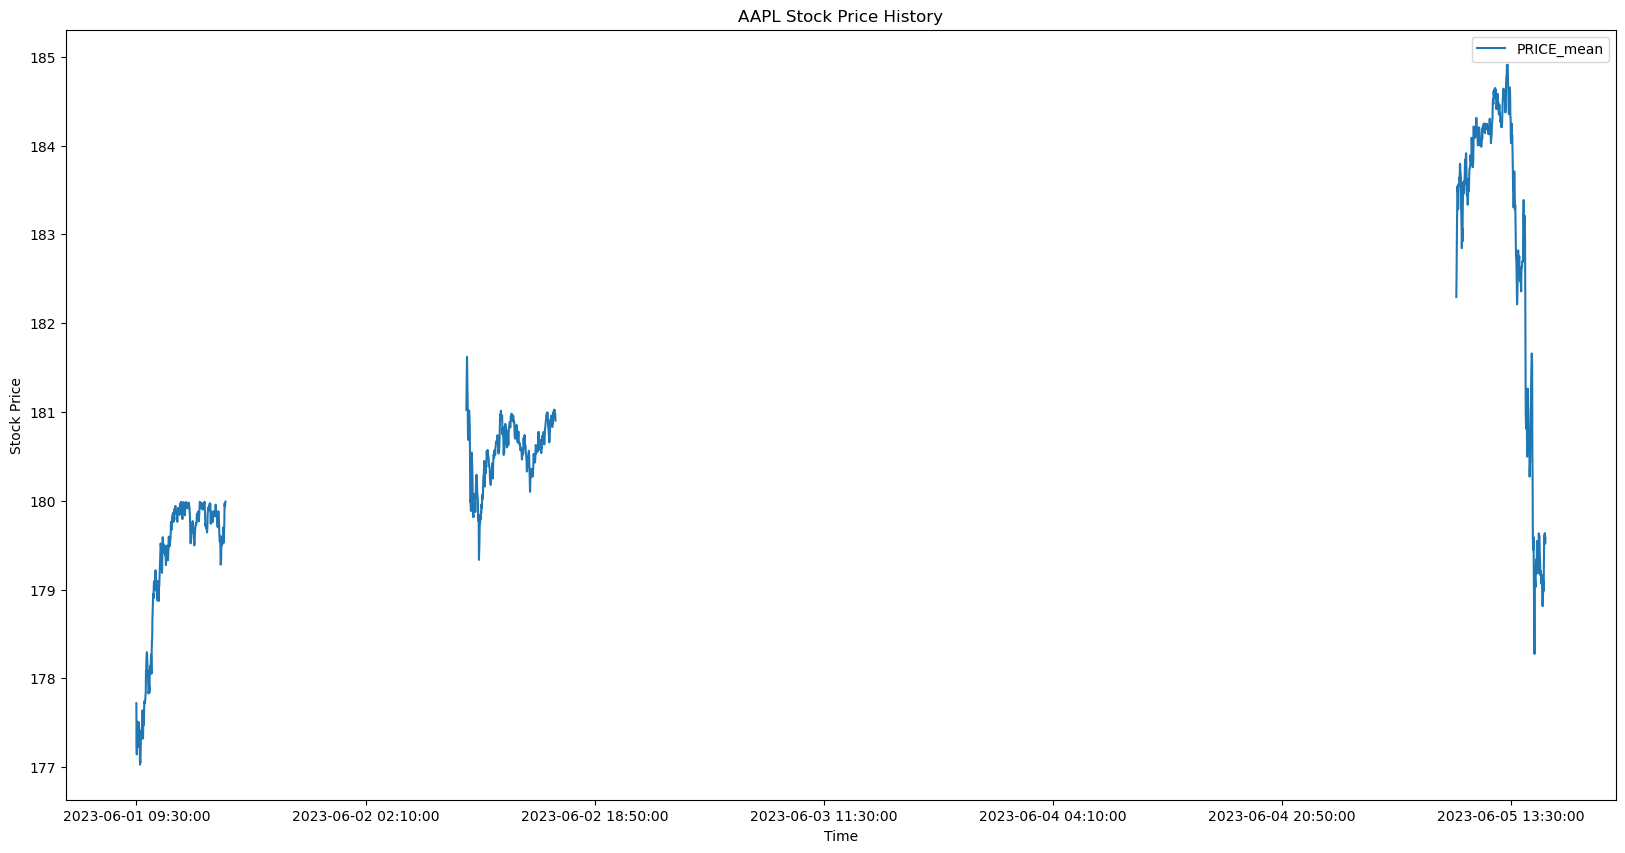

In [1353]:
# Plotting the stock to see the trend
order_trade_merged[['PRICE_mean']].plot(figsize=(20,10))
plt.title('AAPL Stock Price History')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

In [1354]:
print(order_trade_merged.head())

                    SYMBOL  BID_PRICE_1  ASK_PRICE_1  BID_PRICE_2  \
COLLECTION_TIME                                                     
2023-06-01 09:30:00   AAPL   175.558892   179.017191   172.466600   
2023-06-01 09:31:00   AAPL   174.526555   178.728673   172.049358   
2023-06-01 09:32:00   AAPL   175.198658   178.971122   172.637389   
2023-06-01 09:33:00   AAPL   176.381679   179.507488   173.927156   
2023-06-01 09:34:00   AAPL   175.958447   179.615670   173.110890   

                     ASK_PRICE_2  BID_PRICE_3  ASK_PRICE_3  PRICE_mean  \
COLLECTION_TIME                                                          
2023-06-01 09:30:00   181.089909   169.968077   186.488671  177.720254   
2023-06-01 09:31:00   180.821400   170.642845   182.996334  177.252744   
2023-06-01 09:32:00   181.159767   170.957526   183.357753  177.142456   
2023-06-01 09:33:00   181.508706   171.584340   183.759027  177.511517   
2023-06-01 09:34:00   181.581846   171.160274   183.858721  177.512705  

#### Features

In [1355]:
# Calculate bid-ask spreads
for i in range(1, 4):  
    order_trade_merged[f'MID_PRICE_{i}'] = order_trade_merged[[f'BID_PRICE_{i}', f'ASK_PRICE_{i}']].mean(axis=1)

# Calculate bid-ask spreads
for i in range(1, 4):  
    order_trade_merged[f'spread_{i}'] = order_trade_merged[f'ASK_PRICE_{i}'] - order_trade_merged[f'BID_PRICE_{i}']

In [1356]:
# Function to calculate RSI
def RSI(series, period=10):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

# Function to calculate MACD
def MACD(series, slow=26, fast=12):
    exp1 = series.ewm(span=fast, adjust=False).mean()
    exp2 = series.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span=9, adjust=False).mean() 
    return macd, signal

# Function to calculate EMA
def EMA(series, period=20):
    return series.ewm(span=period, adjust=False).mean()

# Calculating RSI for PRICE
order_trade_merged['RSI'] = RSI(order_trade_merged['PRICE_mean'])

# Calculating MACD and MACD signal
order_trade_merged['MACD'], order_trade_merged['MACD_signal'] = MACD(order_trade_merged['PRICE_mean'])

# Calculating EMA
order_trade_merged['EMA5'] = EMA(order_trade_merged['PRICE_mean'], period=5)
order_trade_merged['EMA20'] = EMA(order_trade_merged['PRICE_mean'], period=20)

In [1357]:
print(order_trade_merged.head())

                    SYMBOL  BID_PRICE_1  ASK_PRICE_1  BID_PRICE_2  \
COLLECTION_TIME                                                     
2023-06-01 09:30:00   AAPL   175.558892   179.017191   172.466600   
2023-06-01 09:31:00   AAPL   174.526555   178.728673   172.049358   
2023-06-01 09:32:00   AAPL   175.198658   178.971122   172.637389   
2023-06-01 09:33:00   AAPL   176.381679   179.507488   173.927156   
2023-06-01 09:34:00   AAPL   175.958447   179.615670   173.110890   

                     ASK_PRICE_2  BID_PRICE_3  ASK_PRICE_3  PRICE_mean  \
COLLECTION_TIME                                                          
2023-06-01 09:30:00   181.089909   169.968077   186.488671  177.720254   
2023-06-01 09:31:00   180.821400   170.642845   182.996334  177.252744   
2023-06-01 09:32:00   181.159767   170.957526   183.357753  177.142456   
2023-06-01 09:33:00   181.508706   171.584340   183.759027  177.511517   
2023-06-01 09:34:00   181.581846   171.160274   183.858721  177.512705  

### Data Imputation

In [1358]:
order_trade_merged.isna().sum()

SYMBOL            0
BID_PRICE_1    4980
ASK_PRICE_1    4980
BID_PRICE_2    4980
ASK_PRICE_2    4980
BID_PRICE_3    4980
ASK_PRICE_3    4980
PRICE_mean     4982
PRICE_max      4982
PRICE_min      4982
SIZE_sum          1
MID_PRICE_1    4980
MID_PRICE_2    4980
MID_PRICE_3    4980
spread_1       4980
spread_2       4980
spread_3       4980
RSI            4973
MACD              0
MACD_signal       0
EMA5              0
EMA20             0
dtype: int64

In [1359]:
# Scaling teh data for imputation
data = order_trade_merged.copy()
data.reset_index(inplace=True)
non_numeric_columns = ['COLLECTION_TIME', 'SYMBOL']
non_numeric_data = data[non_numeric_columns]
numeric_data = data.drop(columns=non_numeric_columns)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [1360]:
# Impute missing values
imputer = KNNImputer(n_neighbors=5)
imputed_scaled_data = imputer.fit_transform(scaled_data)

In [1361]:
# Rescale data back to original scale
rescaled_data = scaler.inverse_transform(imputed_scaled_data)
final_numeric_data = pd.DataFrame(rescaled_data, columns=numeric_data.columns)
final_data = pd.concat([non_numeric_data, final_numeric_data], axis=1)

In [1362]:
order_trade_imputed = final_data.copy()
order_trade_imputed.set_index('COLLECTION_TIME', inplace=True)
order_trade_imputed.head()

SYMBOL  BID_PRICE_1  ASK_PRICE_1  BID_PRICE_2  \
COLLECTION_TIME                                                     
2023-06-01 09:30:00   AAPL   175.558892   179.017191   172.466600   
2023-06-01 09:31:00   AAPL   174.526555   178.728673   172.049358   
2023-06-01 09:32:00   AAPL   175.198658   178.971122   172.637389   
2023-06-01 09:33:00   AAPL   176.381679   179.507488   173.927156   
2023-06-01 09:34:00   AAPL   175.958447   179.615670   173.110890   

                     ASK_PRICE_2  BID_PRICE_3  ASK_PRICE_3  PRICE_mean  \
COLLECTION_TIME                                                          
2023-06-01 09:30:00   181.089909   169.968077   186.488671  177.720254   
2023-06-01 09:31:00   180.821400   170.642845   182.996334  177.252744   
2023-06-01 09:32:00   181.159767   170.957526   183.357753  177.142456   
2023-06-01 09:33:00   181.508706   171.584340   183.759027  177.511517   
2023-06-01 09:34:00   181.581846   171.160274   183.858721  177.512705   

                     PRICE_max  PRICE_min  ...  MID_PRICE_2  MID_PRICE_3  \
COLLECTION_TIME                            ...                             
2023-06-01 09:30:00     177.86    177.410  ...   176.778254   178.228374   
2023-06-01 09:31:00     177.52    177.090  ...   176.435379   176.819590   
2023-06-01 09:32:00     177.27    176.950  ...   176.898578   177.157640   
2023-06-01 09:33:00     177.67    177.215  ...   177.717931   177.671684   
2023-06-01 09:34:00     177.60    177.410  ...   177.346368   177.509497   

                     spread_1  spread_2   spread_3        RSI      MACD  \
COLLECTION_TIME                                                           
2023-06-01 09:30:00  3.458299  8.623309  16.520593  63.981484  0.000000   
2023-06-01 09:31:00  4.202117  8.772043  12.353489  54.983056 -0.037294   
2023-06-01 09:32:00  3.772463  8.522379  12.400227  53.230753 -0.074886   
2023-06-01 09:33:00  3.125809  7.581550  12.174687  55.360468 -0.074045   
2023-06-01 09:34:00  3.657223  8.470957  12.698448  50.477608 -0.072447   

                     MACD_signal        EMA5       EMA20  
COLLECTION_TIME                                           
2023-06-01 09:30:00     0.000000  177.720254  177.720254  
2023-06-01 09:31:00    -0.007459  177.564417  177.675729  
2023-06-01 09:32:00    -0.020944  177.423764  177.624942  
2023-06-01 09:33:00    -0.031564  177.453015  177.614139  
2023-06-01 09:34:00    -0.039741  177.472911  177.604479  

[5 rows x 22 columns]

In [1363]:
print(order_trade_imputed.head())

                    SYMBOL  BID_PRICE_1  ASK_PRICE_1  BID_PRICE_2  \
COLLECTION_TIME                                                     
2023-06-01 09:30:00   AAPL   175.558892   179.017191   172.466600   
2023-06-01 09:31:00   AAPL   174.526555   178.728673   172.049358   
2023-06-01 09:32:00   AAPL   175.198658   178.971122   172.637389   
2023-06-01 09:33:00   AAPL   176.381679   179.507488   173.927156   
2023-06-01 09:34:00   AAPL   175.958447   179.615670   173.110890   

                     ASK_PRICE_2  BID_PRICE_3  ASK_PRICE_3  PRICE_mean  \
COLLECTION_TIME                                                          
2023-06-01 09:30:00   181.089909   169.968077   186.488671  177.720254   
2023-06-01 09:31:00   180.821400   170.642845   182.996334  177.252744   
2023-06-01 09:32:00   181.159767   170.957526   183.357753  177.142456   
2023-06-01 09:33:00   181.508706   171.584340   183.759027  177.511517   
2023-06-01 09:34:00   181.581846   171.160274   183.858721  177.512705  

In [1364]:
order_trade_imputed.describe()

BID_PRICE_1  ASK_PRICE_1  BID_PRICE_2  ASK_PRICE_2  BID_PRICE_3  \
count  6151.000000  6151.000000  6151.000000  6151.000000  6151.000000   
mean    180.566919   180.785296   180.179710   180.966485   179.527079   
std       0.981328     0.923424     1.381617     1.002500     2.266879   
min     169.889974   177.254917   154.760000   177.840598   143.500000   
25%     179.926113   180.357253   179.622696   180.670011   179.113162   
50%     180.772195   180.909034   180.575924   181.065210   180.377160   
75%     180.772195   180.909034   180.575924   181.065210   180.377160   
max     184.895028   184.947409   184.787481   186.613604   184.592294   

       ASK_PRICE_3   PRICE_mean    PRICE_max    PRICE_min      SIZE_sum  ...  \
count  6151.000000  6151.000000  6151.000000  6151.000000  6.151000e+03  ...   
mean    181.240515   180.717966   180.750176   180.686335  6.394305e+02  ...   
std       1.515978     0.912775     0.916402     0.910682  2.946583e+03  ...   
min     178.257278   177.027292   177.120000   176.945000 -1.136868e-13  ...   
25%     180.920934   180.073984   180.150000   180.017500  0.000000e+00  ...   
50%     181.240432   180.872294   180.899000   180.847000  0.000000e+00  ...   
75%     181.240432   180.872294   180.899000   180.847000  0.000000e+00  ...   
max     205.046267   184.910714   184.950000   184.880000  1.020260e+05  ...   

       MID_PRICE_2  MID_PRICE_3     spread_1     spread_2     spread_3  \
count  6151.000000  6151.000000  6151.000000  6151.000000  6151.000000   
mean    180.573098   180.383797     0.218377     0.786776     1.713436   
std       1.024160     1.312159     0.488469     1.277549     2.826096   
min     169.545000   164.250000     0.016199     0.051968     0.113092   
25%     180.099037   180.082605     0.136839     0.489286     0.863272   
50%     180.820567   180.808796     0.136839     0.489286     0.863272   
75%     180.820567   180.808796     0.203400     0.832928     1.912729   
max     184.872439   190.941736    12.251067    29.570000    50.344755   

               RSI         MACD  MACD_signal         EMA5        EMA20  
count  6151.000000  6151.000000  6151.000000  6151.000000  6151.000000  
mean     27.300836     0.033106     0.033096   180.782130   180.744722  
std      33.508666     0.066733     0.063378     0.915368     0.943942  
min       0.000000    -0.691844    -0.568960   177.127236   177.319596  
25%       4.243058     0.031153     0.031153   180.129453   180.167915  
50%       4.243058     0.031153     0.031153   180.960061   180.947870  
75%      58.360706     0.032092     0.032650   180.960061   180.947870  
max     100.000000     0.338345     0.316556   184.867082   184.685657  

[8 rows x 21 columns]

In [1365]:
order_trade_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6151 entries, 2023-06-01 09:30:00 to 2023-06-05 16:00:00
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SYMBOL       6151 non-null   object 
 1   BID_PRICE_1  6151 non-null   float64
 2   ASK_PRICE_1  6151 non-null   float64
 3   BID_PRICE_2  6151 non-null   float64
 4   ASK_PRICE_2  6151 non-null   float64
 5   BID_PRICE_3  6151 non-null   float64
 6   ASK_PRICE_3  6151 non-null   float64
 7   PRICE_mean   6151 non-null   float64
 8   PRICE_max    6151 non-null   float64
 9   PRICE_min    6151 non-null   float64
 10  SIZE_sum     6151 non-null   float64
 11  MID_PRICE_1  6151 non-null   float64
 12  MID_PRICE_2  6151 non-null   float64
 13  MID_PRICE_3  6151 non-null   float64
 14  spread_1     6151 non-null   float64
 15  spread_2     6151 non-null   float64
 16  spread_3     6151 non-null   float64
 17  RSI          6151 non-null   float64
 18  MACD         6151 no

In [1366]:
order_trade_imputed = order_trade_imputed[['SYMBOL', 'BID_PRICE_1', 'ASK_PRICE_1', 'BID_PRICE_2', 'ASK_PRICE_2',
       'BID_PRICE_3', 'ASK_PRICE_3', 'PRICE_max', 'PRICE_min',
       'SIZE_sum', 'MID_PRICE_1', 'MID_PRICE_2', 'MID_PRICE_3', 'spread_1', 'spread_2', 'spread_3', 'RSI',
       'MACD', 'MACD_signal', 'EMA5', 'EMA20', 'PRICE_mean']]

C:\Users\yadve\AppData\Local\Temp\ipykernel_38060\707941029.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(order_trade_imputed.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)


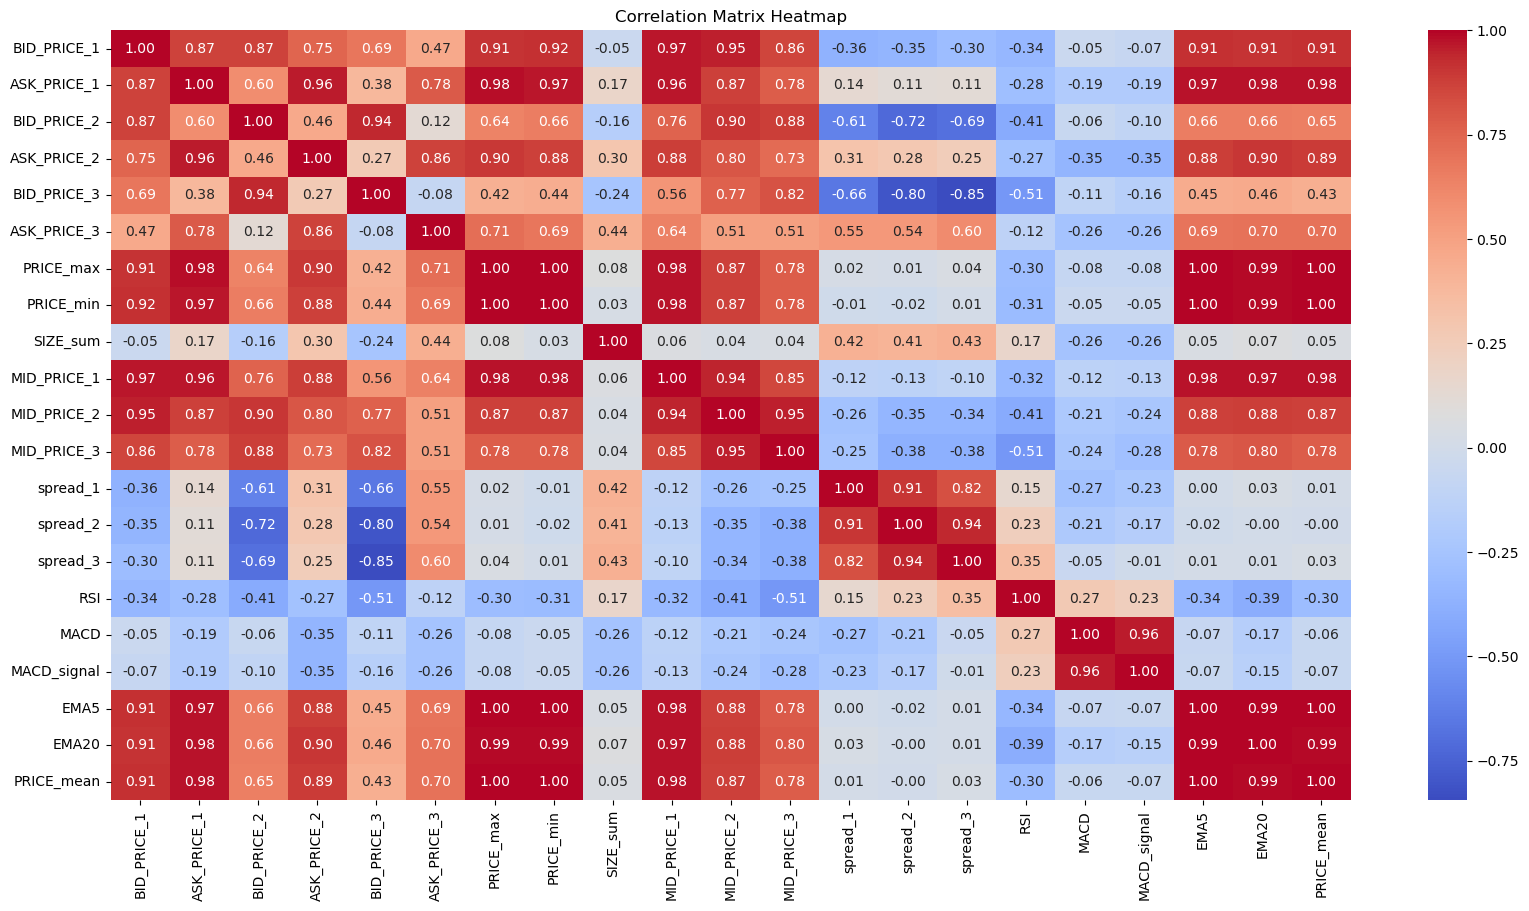

In [1367]:
plt.figure(figsize=(20, 10))
sns.heatmap(order_trade_imputed.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [1368]:
X = order_trade_imputed.select_dtypes(include=[np.number]).dropna()

# Adding a constant column for intercept
X = sm.add_constant(X)

# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


        Feature           VIF
0         const  5.387799e+04
1   BID_PRICE_1           inf
2   ASK_PRICE_1           inf
3   BID_PRICE_2           inf
4   ASK_PRICE_2           inf
5   BID_PRICE_3           inf
6   ASK_PRICE_3           inf
7     PRICE_max  4.090126e+03
8     PRICE_min  3.838973e+03
9      SIZE_sum  2.032904e+00
10  MID_PRICE_1           inf
11  MID_PRICE_2           inf
12  MID_PRICE_3           inf
13     spread_1           inf
14     spread_2           inf
15     spread_3           inf
16          RSI  8.508229e+00
17         MACD  1.453612e+02
18  MACD_signal  6.110400e+01
19         EMA5  3.687688e+03
20        EMA20  3.780026e+03
21   PRICE_mean  1.266586e+04


In [1369]:
final_df = order_trade_imputed[['SYMBOL', 'MID_PRICE_1', 'MID_PRICE_2', 'MID_PRICE_3', 'EMA5', 'EMA20', 'RSI', 'MACD', 'MACD_signal','PRICE_mean']]
final_df.head(20)

SYMBOL  MID_PRICE_1  MID_PRICE_2  MID_PRICE_3        EMA5  \
COLLECTION_TIME                                                                 
2023-06-01 09:30:00   AAPL   177.288041   176.778254   178.228374  177.720254   
2023-06-01 09:31:00   AAPL   176.627614   176.435379   176.819590  177.564417   
2023-06-01 09:32:00   AAPL   177.084890   176.898578   177.157640  177.423764   
2023-06-01 09:33:00   AAPL   177.944584   177.717931   177.671684  177.453015   
2023-06-01 09:34:00   AAPL   177.787059   177.346368   177.509497  177.472911   
2023-06-01 09:35:00   AAPL   176.950353   176.549208   177.013628  177.472714   
2023-06-01 09:36:00   AAPL   177.315819   176.987676   177.086226  177.465408   
2023-06-01 09:37:00   AAPL   177.667973   177.587513   177.383205  177.413605   
2023-06-01 09:38:00   AAPL   176.704402   176.415998   176.464044  177.358432   
2023-06-01 09:39:00   AAPL   176.985726   176.391725   176.151667  177.314279   
2023-06-01 09:40:00   AAPL   177.486935   177.754129   177.912871  177.328367   
2023-06-01 09:41:00   AAPL   177.317311   177.012055   177.009483  177.387358   
2023-06-01 09:42:00   AAPL   176.887852   176.233051   176.126153  177.370438   
2023-06-01 09:43:00   AAPL   177.212066   177.267700   177.263768  177.347963   
2023-06-01 09:44:00   AAPL   177.249337   176.884262   176.785529  177.369769   
2023-06-01 09:45:00   AAPL   176.583186   175.886007   175.643689  177.306368   
2023-06-01 09:46:00   AAPL   176.791526   176.537049   176.482616  177.213342   
2023-06-01 09:47:00   AAPL   176.811070   176.801186   176.857550  177.163201   
2023-06-01 09:48:00   AAPL   177.140362   177.484212   178.008101  177.127236   
2023-06-01 09:49:00   AAPL   177.404071   177.821174   178.125422  177.166716   

                          EMA20        RSI      MACD  MACD_signal  PRICE_mean  
COLLECTION_TIME                                                                
2023-06-01 09:30:00  177.720254  63.981484  0.000000     0.000000  177.720254  
2023-06-01 09:31:00  177.675729  54.983056 -0.037294    -0.007459  177.252744  
2023-06-01 09:32:00  177.624942  53.230753 -0.074886    -0.020944  177.142456  
2023-06-01 09:33:00  177.614139  55.360468 -0.074045    -0.031564  177.511517  
2023-06-01 09:34:00  177.604479  50.477608 -0.072447    -0.039741  177.512705  
2023-06-01 09:35:00  177.591892  53.230753 -0.073591    -0.046511  177.472319  
2023-06-01 09:36:00  177.578454  46.260733 -0.075365    -0.052282  177.450795  
2023-06-01 09:37:00  177.552887  50.461736 -0.087128    -0.059251  177.310000  
2023-06-01 09:38:00  177.523858  44.727676 -0.100291    -0.067459  177.248085  
2023-06-01 09:39:00  177.495488  29.985010 -0.111224    -0.076212  177.225972  
2023-06-01 09:40:00  177.482255  36.680672 -0.108107    -0.082591  177.356543  
2023-06-01 09:41:00  177.484454  62.066998 -0.092563    -0.084585  177.505339  
2023-06-01 09:42:00  177.470373  58.784097 -0.092790    -0.086226  177.336600  
2023-06-01 09:43:00  177.454433  36.453912 -0.094590    -0.087899  177.303011  
2023-06-01 09:44:00  177.450524  44.348954 -0.086118    -0.087543  177.413382  
2023-06-01 09:45:00  177.424718  36.348365 -0.097151    -0.089464  177.179565  
2023-06-01 09:46:00  177.386868  32.397711 -0.116835    -0.094939  177.027292  
2023-06-01 09:47:00  177.356016  38.746523 -0.128084    -0.101568  177.062917  
2023-06-01 09:48:00  177.327377  40.762906 -0.136044    -0.108463  177.055306  
2023-06-01 09:49:00  177.319596  50.813102 -0.125544    -0.111879  177.245678

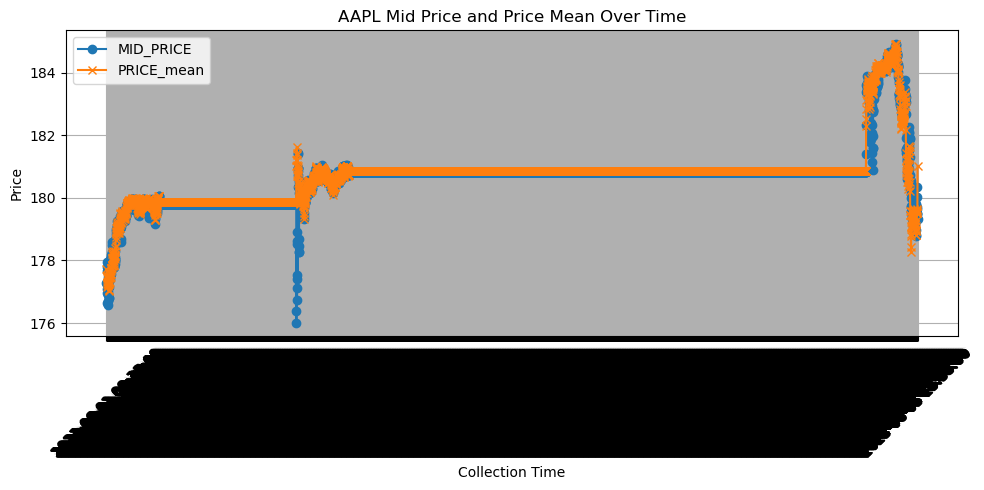

In [1370]:
# Plotting
plt.figure(figsize=(10, 5))  # Set figure size
plt.plot(final_df['MID_PRICE_1'], label='MID_PRICE', marker='o')  # Plot MID_PRICE
plt.plot(final_df['PRICE_mean'], label='PRICE_mean', marker='x')
#plt.plot(final_df['ASK_PRICE_1'], label='ASK_PRICE_1', marker='o') # Plot PRICE_mean

plt.title('AAPL Mid Price and Price Mean Over Time')  # Title of the plot
plt.xlabel('Collection Time')  # Label for the x-axis
plt.ylabel('Price')  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Add legend to the plot
plt.grid(True)  # Add grid for easier reading
plt.tight_layout()  # Adjust layout to not cut off content
plt.show()

In [1371]:
final_df.columns

Index(['SYMBOL', 'MID_PRICE_1', 'MID_PRICE_2', 'MID_PRICE_3', 'EMA5', 'EMA20',
       'RSI', 'MACD', 'MACD_signal', 'PRICE_mean'],
      dtype='object')

In [1372]:
final_df.reset_index(inplace=True)

In [1373]:
final_df = final_df.dropna()

In [1374]:
print(final_df.head(10))

       COLLECTION_TIME SYMBOL  MID_PRICE_1  MID_PRICE_2  MID_PRICE_3  \
0  2023-06-01 09:30:00   AAPL   177.288041   176.778254   178.228374   
1  2023-06-01 09:31:00   AAPL   176.627614   176.435379   176.819590   
2  2023-06-01 09:32:00   AAPL   177.084890   176.898578   177.157640   
3  2023-06-01 09:33:00   AAPL   177.944584   177.717931   177.671684   
4  2023-06-01 09:34:00   AAPL   177.787059   177.346368   177.509497   
5  2023-06-01 09:35:00   AAPL   176.950353   176.549208   177.013628   
6  2023-06-01 09:36:00   AAPL   177.315819   176.987676   177.086226   
7  2023-06-01 09:37:00   AAPL   177.667973   177.587513   177.383205   
8  2023-06-01 09:38:00   AAPL   176.704402   176.415998   176.464044   
9  2023-06-01 09:39:00   AAPL   176.985726   176.391725   176.151667   

         EMA5       EMA20        RSI      MACD  MACD_signal  PRICE_mean  
0  177.720254  177.720254  63.981484  0.000000     0.000000  177.720254  
1  177.564417  177.675729  54.983056 -0.037294    -0.007459

In [1375]:
len(final_df)

6151

### MODEL FITTING

In [1376]:
# Normalize the features
scaler = RobustScaler()
feature_use = final_df.drop(['COLLECTION_TIME', 'SYMBOL'], axis=1).values
df_normalised = scaler.fit_transform(feature_use)

In [1399]:
# Define the size of the training data (60% of the dataset)
train_len = int(len(df_normalized) * 0.6)

# Split remaining data into validation and test data (50% each)
val_test_split_index = train_len + int((len(df_normalized) - train_len) * 0.5)

# Define the window length
window_length = 30

# Function to create dataset with sliding window
def create_dataset(data, start_index, end_index, window_length):
    x_data, y_data = [], []
    for i in range(start_index + window_length, end_index + 1):
        x_data.append(data[i - window_length:i, :])  # Using all features including 'PRICE_mean'
        y_data.append(data[i, -1])  # Assuming the last column is 'PRICE_mean'
    return np.array(x_data), np.array(y_data)

# Prepare training, validation, and test data
x_train, y_train = create_dataset(df_normalized, 0, train_len - 1, window_length)
x_val, y_val = create_dataset(df_normalized, train_len, val_test_split_index - 1, window_length)
x_test, y_test = create_dataset(df_normalized, val_test_split_index, len(df_normalized) - 1, window_length)

In [1405]:
# Flatten the data for Decision Tree Regressor
x_train_tree = x_train.reshape(x_train.shape[0], -1)
x_val_tree = x_val.reshape(x_val.shape[0], -1)
x_test_tree = x_test.reshape(x_test.shape[0], -1)

print(f'x_train_tree shape: {x_train_tree.shape}')
print(f'x_val_tree shape: {x_val_tree.shape}')
print(f'x_test_tree shape: {x_test_tree.shape}')

x_train_tree shape: (3660, 420)
x_val_tree shape: (1200, 420)
x_test_tree shape: (1201, 420)


In [1379]:
pd.DataFrame(x_train_tree).head()

0         1         2         3         4         5         6    \
0  0.143015  0.281335  0.290376  0.326637  0.066904  0.054062  0.050825   
1  0.068792  0.342130  0.295415  0.243679  0.055685  0.087901  0.050825   
2  0.120184  0.307013  0.286957  0.244609  0.043860  0.028598  0.087901   
3  0.216802  0.254160  0.255084  0.240119  0.043041  0.014608  0.028598   
4  0.199098  0.297594  0.285215  0.250546  0.042399  0.061423  0.014608   

        7         8         9    ...       410       411       412       413  \
0  0.049750  0.060621  0.061743  ...  0.028463  0.068157  0.077628  0.061593   
1  0.049716  0.048934  0.052286  ...  0.029645  0.037187  0.068157  0.077628   
2  0.056315  0.037609  0.054678  ...  0.032756  0.057204  0.037187  0.068157   
3  0.087901  0.048052  0.057430  ...  0.035032  0.068537  0.057204  0.037187   
4  0.028598  0.087901  0.054554  ...  0.034987  0.067112  0.068537  0.057204   

        414       415       416       417       418       419  
0  0.056051  0.052924  0.050243  0.037945  0.037154  0.044030  
1  0.061593  0.056051  0.052924  0.050243  0.037945  0.037154  
2  0.077628  0.061593  0.056051  0.052924  0.050243  0.037945  
3  0.068157  0.077628  0.061593  0.056051  0.052924  0.050243  
4  0.037187  0.068157  0.077628  0.061593  0.056051  0.052924  

[5 rows x 420 columns]

In [1380]:
len(y_train)

3660

In [1381]:
pd.DataFrame(x_train_tree).head()

0         1         2         3         4         5         6    \
0  0.143015  0.281335  0.290376  0.326637  0.066904  0.054062  0.050825   
1  0.068792  0.342130  0.295415  0.243679  0.055685  0.087901  0.050825   
2  0.120184  0.307013  0.286957  0.244609  0.043860  0.028598  0.087901   
3  0.216802  0.254160  0.255084  0.240119  0.043041  0.014608  0.028598   
4  0.199098  0.297594  0.285215  0.250546  0.042399  0.061423  0.014608   

        7         8         9    ...       410       411       412       413  \
0  0.049750  0.060621  0.061743  ...  0.028463  0.068157  0.077628  0.061593   
1  0.049716  0.048934  0.052286  ...  0.029645  0.037187  0.068157  0.077628   
2  0.056315  0.037609  0.054678  ...  0.032756  0.057204  0.037187  0.068157   
3  0.087901  0.048052  0.057430  ...  0.035032  0.068537  0.057204  0.037187   
4  0.028598  0.087901  0.054554  ...  0.034987  0.067112  0.068537  0.057204   

        414       415       416       417       418       419  
0  0.056051  0.052924  0.050243  0.037945  0.037154  0.044030  
1  0.061593  0.056051  0.052924  0.050243  0.037945  0.037154  
2  0.077628  0.061593  0.056051  0.052924  0.050243  0.037945  
3  0.068157  0.077628  0.061593  0.056051  0.052924  0.050243  
4  0.037187  0.068157  0.077628  0.061593  0.056051  0.052924  

[5 rows x 420 columns]

In [1382]:
# Define the model
regressor = DecisionTreeRegressor(random_state=42)

# Parameter grid for Grid Search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 3, 4, 5, 7, 10, 20, 30],
    'min_samples_leaf': [1, 2, 3, 4, 5, 7, 10, 20],
    'ccp_alpha': [0.0, 0.000001, 0.00001, 0.0001, 0.001, 0.1, 1]
}

In [1383]:
# Grid Search setup
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [1384]:
# For Grid Search
grid_search.fit(x_train_tree, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 1e-06, 1e-05, 0.0001, 0.001, 0.1,
                                       1],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 7, 10, 20],
                         'min_samples_split': [2, 3, 4, 5, 7, 10, 20, 30]},
             scoring='neg_mean_squared_error')

In [1385]:
# Best parameters from Grid Search
print("Best parameters from Grid Search:", grid_search.best_params_)
print("Best score from Grid Search:", grid_search.best_score_)

# best estimator
best_regressor = grid_search.best_estimator_

Best parameters from Grid Search: {'ccp_alpha': 0.0, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best score from Grid Search: -0.0006710253795727494


In [1401]:
y_val_pred = best_regressor.predict(x_val_tree)
y_test_pred = best_regressor.predict(x_test_tree)

# Calculate and print MSE
val_mse = mean_squared_error(y_val, y_val_pred)
print(f'Validation MSE: {val_mse}')
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Test MSE: {test_mse}')

Validation MSE: 9.901621411807187e-14
Test MSE: 0.026939818095536066


In [1402]:
importances = best_regressor.feature_importances_
print(importances)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.12628706e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.32866873e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.61565749e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [1408]:
len(y_test_pred)

1201

In [1409]:
len(y_test)

1201

In [1410]:
# rescaling back the data
y_pred_reshaped = y_test_pred.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

# Create an array for inverse transformation, it should have the same shape as when it was transformed
transformed_shape = np.zeros((len(y_pred_reshaped), df_normalised.shape[1]))
transformed_shape[:, -1] = y_pred_reshaped[:, 0]  # Assume PRICE_mean is the last column in normalized_features

# Inverse transform predictions
y_pred_actual = scaler.inverse_transform(transformed_shape)[:, -1]

# Do the same for y_test if necessary
transformed_shape[:, -1] = y_test_reshaped[:, 0]
y_test_actual = scaler.inverse_transform(transformed_shape)[:, -1]

In [1391]:
y_test_pred

array([0.50076445, 0.50076445, 0.50076445, ..., 0.24506863, 0.26468263,
       0.2498946 ])

In [1411]:
test_data_rescaled = pd.DataFrame({
    'Actual': y_test_actual,
    'Predicted': y_pred_actual
})

# Reset index if necessary (if it's a time series)
test_data_rescaled.reset_index(inplace=True, drop=True)

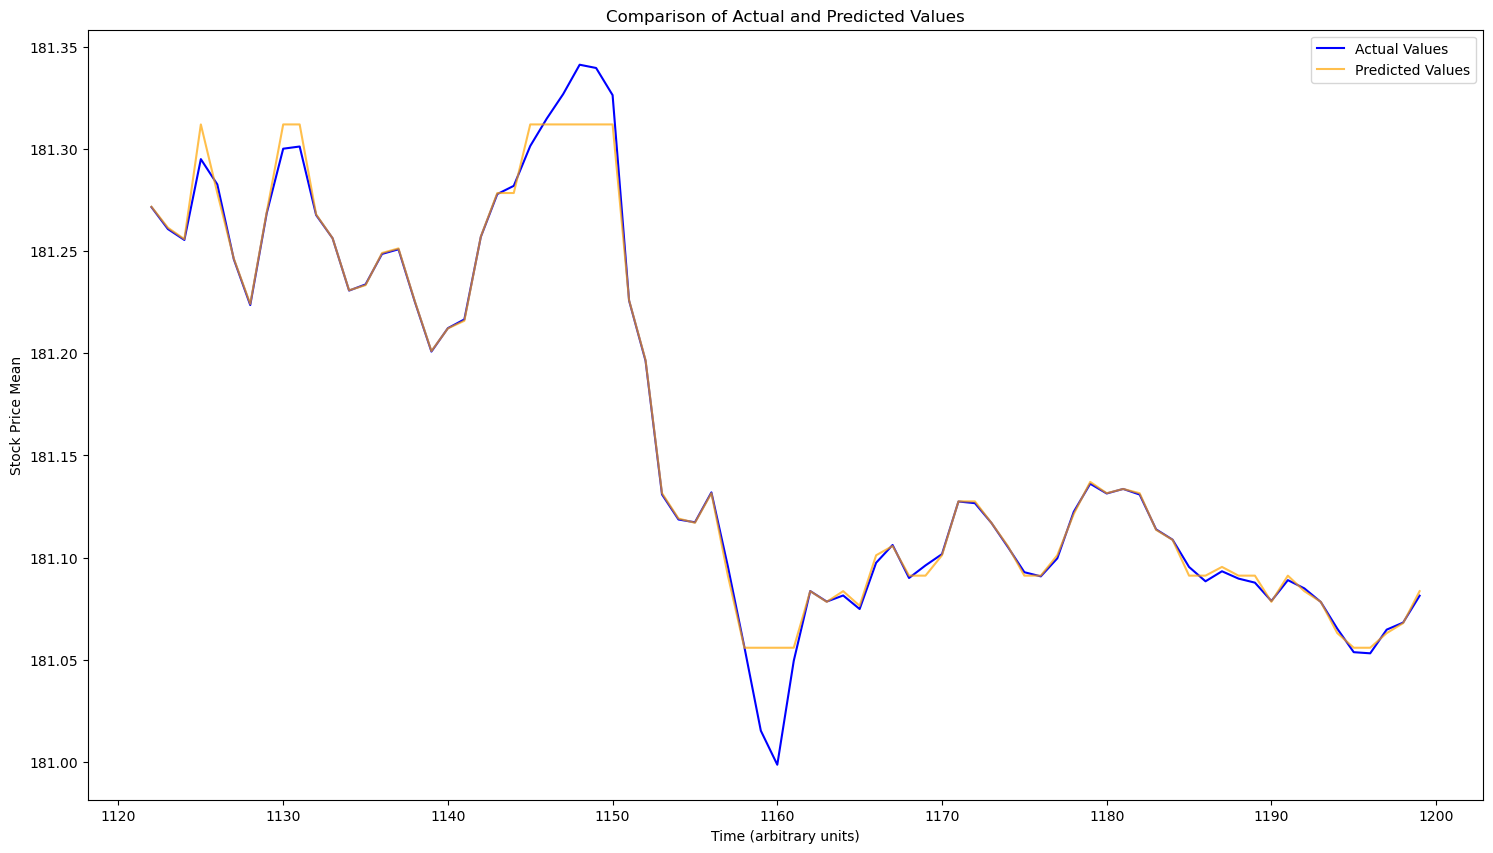

In [1420]:
# Plotting the results
start_index = 1122  # Start index of the range you want to focus on
end_index = 1200    # End index of the range

plt.figure(figsize=(18, 10))
plt.plot(test_data_rescaled['Actual'][start_index:end_index], label='Actual Values', color='blue')
plt.plot(test_data_rescaled['Predicted'][start_index:end_index], label='Predicted Values', color='orange', alpha=0.7)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Stock Price Mean')
plt.legend()
plt.show()

In [1029]:
# RandomForestRegressor setup
rf_regressor = RandomForestRegressor(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 1, 2, 5, 10, 20, 30],
    'min_samples_split': [2, 3, 4, 5, 7, 10, 20, 30],
    'min_samples_leaf': [1, 2, 3, 4, 5, 7, 10, 20]
}

# GradientBoostingRegressor setup
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [None, 1, 2, 5, 10, 20, 30],
    'min_samples_split': [2, 3, 4, 5, 7, 10, 20, 30],
    'min_samples_leaf': [1, 2, 3, 4, 5, 7, 10, 20]
}

# Grid Search for RandomForest
rf_grid_search = GridSearchCV(rf_regressor, rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(x_train_tree, y_train)
print("Best parameters for RandomForest:", rf_grid_search.best_params_)
print("Best score for RandomForest:", rf_grid_search.best_score_)

# Grid Search for GradientBoosting
gb_grid_search = GridSearchCV(gb_regressor, gb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid_search.fit(x_train_tree, y_train)
print("Best parameters for GradientBoosting:", gb_grid_search.best_params_)
print("Best score for GradientBoosting:", gb_grid_search.best_score_)

# Using the best estimators
best_rf = rf_grid_search.best_estimator_
best_gb = gb_grid_search.best_estimator_

# Predictions and evaluation
rf_val_predictions = best_rf.predict(x_val_tree)
gb_val_predictions = best_gb.predict(x_val_tree)

rf_test_predictions = best_rf.predict(x_test_tree)
gb_test_predictions = best_gb.predict(x_test_tree)

print("RandomForest Validation MSE:", mean_squared_error(y_val, rf_val_predictions))
print("GradientBoosting Validation MSE:", mean_squared_error(y_val, gb_val_predictions))
print("RandomForest Test MSE:", mean_squared_error(y_test, rf_test_predictions))
print("GradientBoosting Test MSE:", mean_squared_error(y_test, gb_test_predictions))

# Plotting the results for GradientBoosting (example)
test_data_gb = pd.DataFrame({
    'Actual': y_test,
    'Predicted': gb_test_predictions
})

test_data_gb.reset_index(inplace=True, drop=True)

plt.figure(figsize=(14, 7))
plt.plot(test_data_gb['Actual'], label='Actual Values', color='blue')
plt.plot(test_data_gb['Predicted'], label='Predicted Values', color='orange', alpha=0.7)
plt.title('Comparison of Actual and Predicted Values (GradientBoosting)')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Stock Price Mean')
plt.legend()
plt.show()

KeyboardInterrupt: 